# Trimming the boundaries of categorization for RA permits by hand
Of course we can apply all sorts of 'quantiles' classification but the 'psychological' categorization by humans applying for the permit and issuing it is more important, because humans 'intuitively' categorize certain types of jobs in a certain price range, which makes the probability of finding _your_ particular kind in just one of these 'psychological bins'.

In [50]:
import sqlalchemy as sqlalc
import pandas as pd
import sorting
import matplotlib.pyplot as plt
import numpy

We take a table 'PERMIT - RENOVATION/ALTERATION' from the firstbase.sqlite and will be storing the results in secondbase.sqlite

In [51]:
conn_source = sqlalc.create_engine(sorting.TARGET_DATABASE_URI)
conn_target = sqlalc.create_engine(sorting.INTERM_DATABASE_URI)
    
permits = pd.read_sql_table(table_name='PERMIT - RENOVATION/ALTERATION', con=conn_source)

Verify what we've ingested

In [52]:
permits.head(n=2)

,id,permit_,permit_type,review_type,application_start_date,issue_date,processing_time,street_number,street_direction,street_name,...,contact_13_type,contact_13_name,contact_13_city,contact_13_state,contact_13_zipcode,contact_14_type,contact_14_name,contact_14_city,contact_14_state,contact_14_zipcode
0,2911320,100744037,PERMIT - RENOVATION/ALTERATION,STANDARD PLAN REVIEW,2018-02-22,2019-01-02,314.0,114,W,GRAND,...,None,None,None,None,None,None,None,None,None,None
1,2940830,100761708,PERMIT - RENOVATION/ALTERATION,STANDARD PLAN REVIEW,2018-07-11,2019-01-02,175.0,1603,S,WOOD,...,None,None,None,None,None,None,None,None,None,None


The task is: to figure out the costs/numbers of the boundaries between 'normal' permits, 'large' permits (marked 'L'), 'extra large' (marked 'XL') and 'super large' (marked as 'XXL'). The simplest way to do it is by plotting and changing the parameters.

One column will be enough for this analysis.

In [53]:
reported_costs = permits.loc[:, ['reported_cost']]
mper = {'reported_cost': 'permits'}
reported_costs = reported_costs.rename(mapper=mper, axis='columns')
reported_costs.count(axis='index')

permits    9493
dtype: int64

In [54]:
L_and_more_removed = reported_costs[reported_costs['permits'] < 50000]
L_and_more_removed.count()

permits    4427
dtype: int64

In [55]:
# prepare to plot
font_d = {'family': 'serif', 'color':  'black', 'weight': 'normal', 'size': 16}

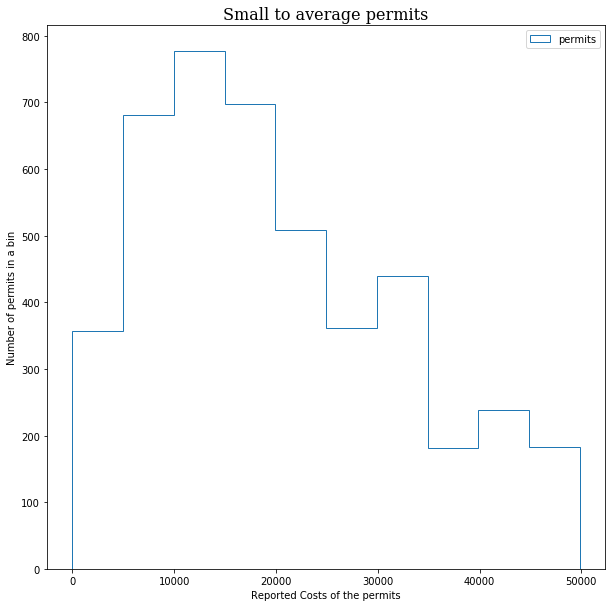

In [56]:
Fig_1 = L_and_more_removed.plot.hist(bins=10, histtype='step', figsize=(10, 10))
Fig_1.set_title('Small to average permits', fontdict=font_d)
Fig_1.set_xlabel('Reported Costs of the permits')
Fig_1.set_ylabel('Number of permits in a bin')
plt.show()

In [57]:
L_without_XL_and_more = reported_costs[(reported_costs['permits'] >= 50000) & (reported_costs['permits'] < 500000)]
L_without_XL_and_more.count()

permits    3970
dtype: int64

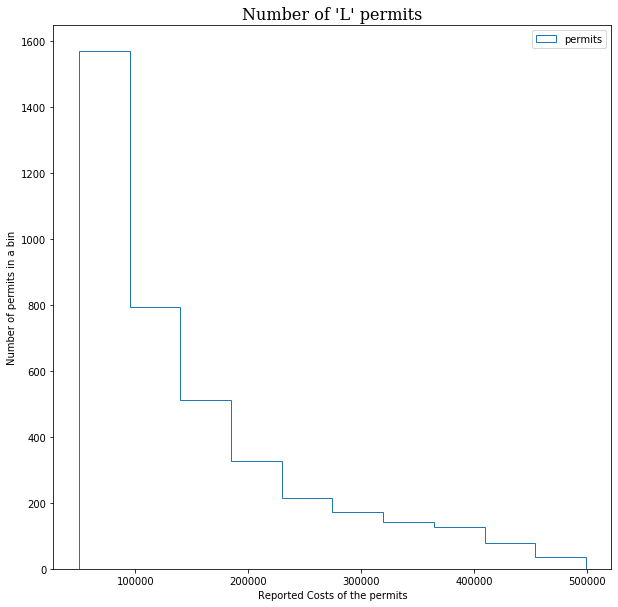

In [58]:
Fig_2 = L_without_XL_and_more.plot.hist(bins=10, histtype='step', figsize=(10, 10))
Fig_2.set_title("Number of 'L' permits", fontdict=font_d)
Fig_2.set_xlabel('Reported Costs of the permits')
Fig_2.set_ylabel('Number of permits in a bin')
plt.show()

In [59]:
XL_without_XXL = reported_costs[(reported_costs['permits'] >= 500000) & (reported_costs['permits'] < 5000000)]
XL_without_XXL.count()

permits    960
dtype: int64

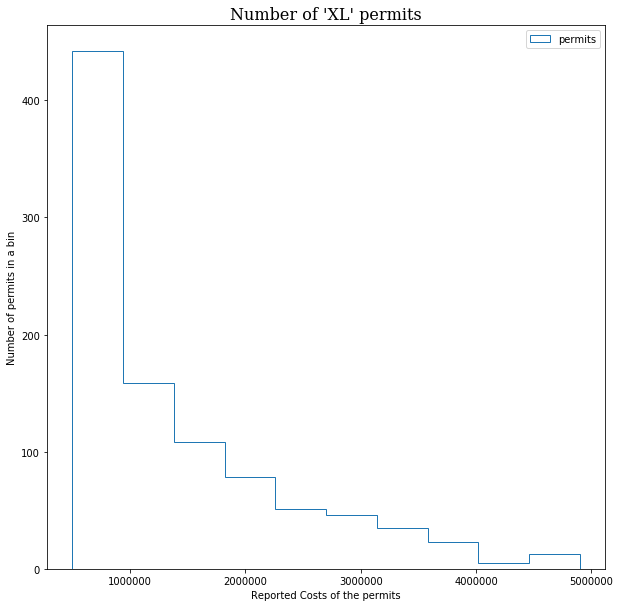

In [60]:
Fig_3 = XL_without_XXL.plot.hist(bins=10, histtype='step', figsize=(10, 10))
Fig_3.set_title("Number of 'XL' permits", fontdict=font_d)
Fig_3.set_xlabel('Reported Costs of the permits')
Fig_3.set_ylabel('Number of permits in a bin')
plt.show()

In [61]:
XXL = reported_costs[(reported_costs['permits'] >= 5000000) & (reported_costs['permits'] < 500000000)]
XXL.count()

permits    136
dtype: int64

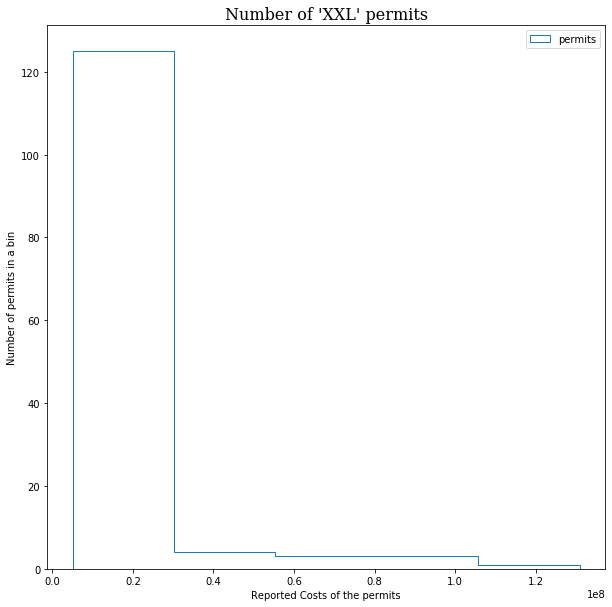

In [62]:
Fig_4 = XXL.plot.hist(bins=5, histtype='step', figsize=(10, 10))
Fig_4.set_title("Number of 'XXL' permits", fontdict=font_d)
Fig_4.set_xlabel('Reported Costs of the permits')
Fig_4.set_ylabel('Number of permits in a bin')
plt.show()

These are, obviously, very rare events (in this category) already.

Fin